<a href="https://colab.research.google.com/github/dhanaabhirajk/tensorflow-learn/blob/main/tensorflow_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("tensorflow")

tensorflow


In [2]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

In [3]:
a = tf.constant([1,2],name="a",dtype = tf.float32)
a

<tf.Tensor 'a:0' shape=(2,) dtype=float32>

In [4]:
session = tf.compat.v1.Session()
session.run(a[0])

1.0

In [5]:
scalar = tf.constant(9)
vector = tf.constant([1,2,3,4])
matrix = tf.constant([[1,2,3,4],[5,6,7,8],[3,5,8,0]])
tensor = tf.constant([[[1,2,3,4],[5,6,7,8],[3,5,8,0]],[[9,8,90,89],[90,0,9,0],[9,8,78,67]]])

In [6]:
with tf.compat.v1.Session() as session:
  output = session.run(scalar);
  print("scalar : ",output);
  output = session.run(vector)
  print("vector : ",output)
  output = session.run(matrix)
  print("matrix : ",output)
  output = session.run(tensor)
  print("tensor : ",output)

scalar :  9
vector :  [1 2 3 4]
matrix :  [[1 2 3 4]
 [5 6 7 8]
 [3 5 8 0]]
tensor :  [[[ 1  2  3  4]
  [ 5  6  7  8]
  [ 3  5  8  0]]

 [[ 9  8 90 89]
  [90  0  9  0]
  [ 9  8 78 67]]]


In [7]:
a = tf.Variable(tf.zeros([5]), name="a")
print(a)

<tf.Variable 'a_1:0' shape=(5,) dtype=float32>


In [8]:
#define a variable to hold zeros
variable = tf.Variable(tf.zeros(5))

#initialize the variable
init_op = tf.compat.v1.initialize_all_variables()
#execute init_op
with tf.compat.v1.Session() as session:
  session.run(init_op)
  print(session.run(variable))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
[0. 0. 0. 0. 0.]


In [9]:
lis = [[1,2,4,4],[1,2,4,4]]
tensor_1d = tf.convert_to_tensor(lis)

In [10]:
with tf.compat.v1.Session() as session:
  print(session.run(tensor_1d))

[[1 2 4 4]
 [1 2 4 4]]


In [11]:
tensor_1d.shape

TensorShape([2, 4])

In [12]:
with tf.compat.v1.Session() as session:
  #rank
  print(session.run(tf.rank(vector)))

1


In [13]:
#multiplication

m1 = tf.constant([[5,2],
                  [1,2]],dtype=tf.float64)
m2 = tf.constant([[1,2],
                  [1,2]],dtype=tf.float64)
with tf.compat.v1.Session() as session:
  #normal multiplication
  print(session.run(m1*m2))
  #tensorflow multiplication
  print(session.run(tf.multiply(m1,m2)))
  #matrix multiplication
  print(session.run(tf.matmul(m1,m2)))
  #matix determinant
  print(session.run(tf.compat.v1.matrix_determinant(m1)))

[[5. 4.]
 [1. 4.]]
[[5. 4.]
 [1. 4.]]
[[ 7. 14.]
 [ 3.  6.]]
7.999999999999998


In [14]:
b = tf.Variable(1.0)
print(a)

<tf.Variable 'a_1:0' shape=(5,) dtype=float32>


In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches 
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize']=(5,3)

In [16]:
x = np.arange(0,10,0.15)

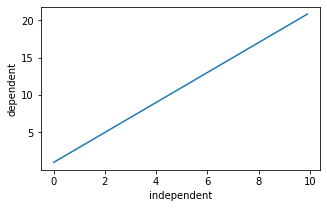

In [17]:
#range of numbers from 0 to 10 with interval of 0.15
x = np.arange(0,10,0.15)
#slope and intercept
m = 2
c = 1
y = x*m +c
plt.plot(x,y)
plt.xlabel("independent")
plt.ylabel("dependent")
plt.show()

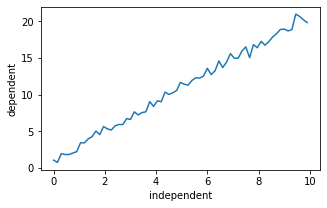

In [18]:
xdata = np.arange(0,10,0.15)
#slope and intercept
m = 2
c = 1
ydata = xdata*m +c
ydata = np.vectorize(lambda y:y + np.random.normal(loc = 0.0,scale=0.5))(ydata)
plt.plot(xdata,ydata)
plt.xlabel("independent")
plt.ylabel("dependent")
plt.show()

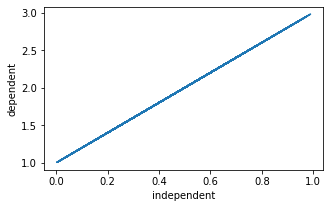

In [19]:
xdata = np.random.rand(100).astype(np.float32)
#slope and intercept
m = 2
c = 1
ydata = xdata*m +c
plt.plot(xdata,ydata)
plt.xlabel("independent")
plt.ylabel("dependent")
plt.show()

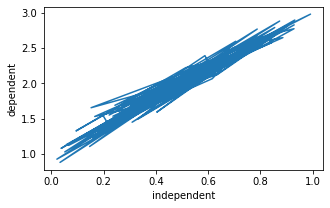

In [20]:
xdata = np.random.rand(100).astype(np.float32)
#slope and intercept
m = 2
c = 1
ydata = xdata*m +c
ydata = np.vectorize(lambda y:y + np.random.normal(loc = 0.0,scale=0.1))(ydata)
plt.plot(xdata,ydata)
plt.xlabel("independent")
plt.ylabel("dependent")
plt.show()

In [21]:
#calculating the predictions
a = tf.Variable(1.0)
b = tf.Variable(0.2)
ypred = a * xdata + b

In [22]:
learningRate = 0.5
cost_function = tf.reduce_mean(tf.square(ypred-ydata))
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learningRate)
train = optimizer.minimize(cost_function)

In [23]:
model = tf.compat.v1.initialize_all_variables()
session = tf.compat.v1.Session()
session.run(model)

In [24]:
trainData = []
for step in range(100):
  evals = session.run([train,a,b])[1:]
  if step % 5 == 0:
    print(step, evals)
    trainData.append(evals)

0 [1.0, 0.2]
5 [1.6699487, 1.1797073]
10 [1.7453748, 1.1357533]
15 [1.8030924, 1.1040635]
20 [1.8466384, 1.0801508]
25 [1.8794937, 1.062109]
30 [1.9042827, 1.0484965]
35 [1.9229859, 1.038226]
40 [1.9370974, 1.0304769]
45 [1.9477446, 1.0246302]
50 [1.9557778, 1.0202188]
55 [1.9618387, 1.0168906]
60 [1.9664117, 1.0143795]
65 [1.969862, 1.0124848]
70 [1.9724653, 1.0110552]
75 [1.9744295, 1.0099766]
80 [1.9759114, 1.0091629]
85 [1.9770294, 1.008549]
90 [1.9778731, 1.0080857]
95 [1.9785094, 1.0077362]


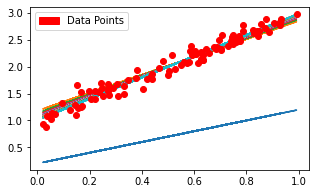

In [25]:
import matplotlib
converter = matplotlib.colors
cr,cg,cb = (1.0,1.0,1.0)
for f in trainData:
  cb += 1.0/len(trainData)
  cg -= 1.0/len(trainData)
  if cb > 1.0: cb = 0.2
  if cg < 1.0: cg = 0.7
  [a,b] = f
  f_y = np.vectorize(lambda x: a*x + b)(xdata)
  line = plt.plot(xdata,f_y)
  #plt.setp(line,color = (cr,cg,cb))
plt.plot(xdata,ydata,'ro')
greenLine = mpatches.Patch(color = 'red', label= 'Data Points')
plt.legend(handles=[greenLine])
plt.show()

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1]),
])

In [27]:
model.compile(optimizer='sgd', loss='mean_squared_error')

In [28]:
model.fit(xdata, ydata, epochs=500)

Train on 100 samples
Epoch 1/500
100/100 [==============================] - 0s 2ms/sample - loss: 3.1546
Epoch 2/500
100/100 [==============================] - 0s 192us/sample - loss: 2.5330
Epoch 3/500
100/100 [==============================] - 0s 199us/sample - loss: 2.0463
Epoch 4/500
100/100 [==============================] - 0s 279us/sample - loss: 1.6778
Epoch 5/500
100/100 [==============================] - 0s 301us/sample - loss: 1.3819
Epoch 6/500
100/100 [==============================] - 0s 229us/sample - loss: 1.1413
Epoch 7/500
100/100 [==============================] - 0s 179us/sample - loss: 0.9314
Epoch 8/500
100/100 [==============================] - 0s 447us/sample - loss: 0.7682
Epoch 9/500
100/100 [==============================] - 0s 294us/sample - loss: 0.6344
Epoch 10/500
100/100 [==============================] - 0s 392us/sample - loss: 0.5295
Epoch 11/500
100/100 [==============================] - 0s 262us/sample - loss: 0.4440
Epoch 12/500
100/100 [===========

In [29]:
model.predict([12.0])

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


array([[23.830975]], dtype=float32)

In [30]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [32]:
path = "/content/CarPrice_Assignment.csv"
df = pd.read_csv(path)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [33]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [34]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

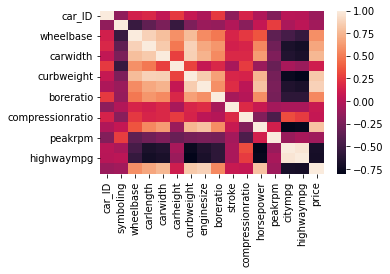

In [35]:
sns.heatmap(df.corr())

In [36]:
 df.corr()\
            .style \
            .background_gradient(axis=None)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


In [37]:
x = df.enginesize
y = df.price

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


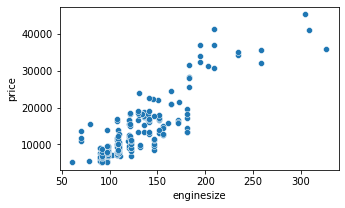

In [38]:
sns.scatterplot(x,y)

In [39]:
df.shape

(205, 26)

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [41]:
x_train.shape

(153,)

In [42]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [43]:
lr.fit(np.array(x_train).reshape(-1,1),y_train)

LinearRegression()

In [44]:
lr.intercept_

-7565.673310993821

In [45]:
lr.coef_

array([164.15281584])

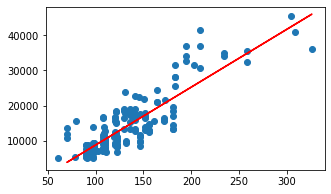

In [46]:
plt.scatter(x, y)
plt.plot(x_train, lr.coef_*x_train + lr.intercept_, '-r')

In [47]:
lr.predict([[300]])

array([41680.17144053])

In [48]:
predict_y = lr.predict(np.array(x_test).reshape(-1,1))

In [49]:
from sklearn.metrics import r2_score
#regression score function. Best possible score is 1.
print(r2_score(y_test, predict_y))

0.7691796723366883


##Logistic Regression

In [50]:
import numpy as np # linear algebra
import seaborn as sns
sns.set(style='whitegrid')
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [51]:
path = "/content/Iris.csv"
iris = pd.read_csv(path)

In [52]:
iris.shape

(150, 6)

In [53]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [54]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [55]:
iris.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [56]:
iris = iris[:100]

In [57]:
iris.Species = iris.Species.replace(to_replace = ['Iris-setosa', 'Iris-versicolor'],value=[0,1])

In [58]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


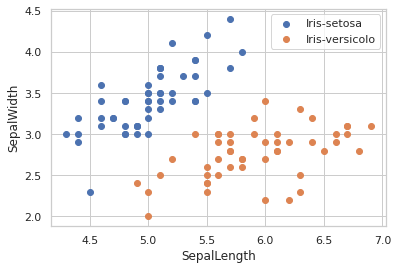

In [59]:
plt.scatter(iris[:50].SepalLengthCm, iris[:50].SepalWidthCm, label='Iris-setosa')
plt.scatter(iris[51:].SepalLengthCm, iris[51:].SepalWidthCm, label='Iris-versicolo')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.legend(loc='best')

In [60]:
X = iris.drop(labels=['Id', 'Species'], axis=1).values
y = iris.Species.values

In [61]:
# set seed for numpy and tensorflow
# set for reproducible results
seed = 5
np.random.seed(seed)
tf.compat.v1.set_random_seed(seed)


In [62]:
# set replace=False, Avoid double sampling
train_index = np.random.choice(len(X), round(len(X) * 0.8), replace=False)

In [63]:
# diff set
test_index = np.array(list(set(range(len(X))) - set(train_index)))
train_X = X[train_index]
train_y = y[train_index]
test_X = X[test_index]
test_y = y[test_index]

In [64]:
# Define the normalized function
def min_max_normalized(data):
    col_max = np.max(data, axis=0)
    col_min = np.min(data, axis=0)
    return np.divide(data - col_min, col_max - col_min)

In [65]:
# Normalized processing, must be placed after the data set segmentation, 
# otherwise the test set will be affected by the training set
train_X = min_max_normalized(train_X)
test_X = min_max_normalized(test_X)


In [66]:
# Begin building the model framework
# Declare the variables that need to be learned and initialization
# There are 4 features here, A's dimension is (4, 1)
A = tf.Variable(tf.compat.v1.random_normal(shape=[4, 1]))
b = tf.Variable(tf.compat.v1.random_normal(shape=[1, 1]))
init = tf.compat.v1.global_variables_initializer()
sess = tf.compat.v1.Session()
sess.run(init)

In [67]:
data = tf.compat.v1.placeholder(dtype=tf.float32, shape=[None, 4])
target = tf.compat.v1.placeholder(dtype=tf.float32, shape=[None, 1])

In [68]:
# Declare the model you need to learn
mod = tf.matmul(data, A) + b

In [69]:
# Declare loss function
# Use the sigmoid cross-entropy loss function,
# first doing a sigmoid on the model result and then using the cross-entropy loss function
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=mod, labels=target))

In [70]:
# Define the learning rate， batch_size etc.
learning_rate = 0.003
batch_size = 30
iter_num = 1500

In [71]:
# Define the optimizer
opt = tf.compat.v1.train.GradientDescentOptimizer(learning_rate)
# Define the goal
goal = opt.minimize(loss)

In [72]:
# Define the accuracy
# The default threshold is 0.5, rounded off directly
prediction = tf.round(tf.sigmoid(mod))
# Bool into float32 type
correct = tf.cast(tf.equal(prediction, target), dtype=tf.float32)
# Average
accuracy = tf.reduce_mean(correct)
# End of the definition of the model framework

In [73]:
# Start training model
# Define the variable that stores the result
loss_trace = []
train_acc = []
test_acc = []

In [74]:
# training model
for epoch in range(iter_num):
    # Generate random batch index
    batch_index = np.random.choice(len(train_X), size=batch_size)
    batch_train_X = train_X[batch_index]
    batch_train_y = np.matrix(train_y[batch_index]).T
    sess.run(goal, feed_dict={data: batch_train_X, target: batch_train_y})
    temp_loss = sess.run(loss, feed_dict={data: batch_train_X, target: batch_train_y})
    # convert into a matrix, and the shape of the placeholder to correspond
    temp_train_acc = sess.run(accuracy, feed_dict={data: train_X, target: np.matrix(train_y).T})
    temp_test_acc = sess.run(accuracy, feed_dict={data: test_X, target: np.matrix(test_y).T})
    # recode the result
    loss_trace.append(temp_loss)
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    # output
    if (epoch + 1) % 5 == 0:
        print('epoch: {:4d} loss: {:5f} train_acc: {:5f} test_acc: {:5f}'.format(epoch + 1, temp_loss,temp_train_acc, temp_test_acc))

epoch:    5 loss: 1.458364 train_acc: 0.537500 test_acc: 0.350000
epoch:   10 loss: 1.584685 train_acc: 0.537500 test_acc: 0.350000
epoch:   15 loss: 1.764663 train_acc: 0.537500 test_acc: 0.350000
epoch:   20 loss: 1.511782 train_acc: 0.537500 test_acc: 0.350000
epoch:   25 loss: 1.340418 train_acc: 0.537500 test_acc: 0.350000
epoch:   30 loss: 1.375067 train_acc: 0.537500 test_acc: 0.350000
epoch:   35 loss: 0.910260 train_acc: 0.537500 test_acc: 0.350000
epoch:   40 loss: 1.169785 train_acc: 0.537500 test_acc: 0.350000
epoch:   45 loss: 1.615018 train_acc: 0.537500 test_acc: 0.350000
epoch:   50 loss: 1.746500 train_acc: 0.537500 test_acc: 0.350000
epoch:   55 loss: 1.696329 train_acc: 0.537500 test_acc: 0.350000
epoch:   60 loss: 0.980942 train_acc: 0.537500 test_acc: 0.350000
epoch:   65 loss: 1.253444 train_acc: 0.537500 test_acc: 0.350000
epoch:   70 loss: 1.596031 train_acc: 0.537500 test_acc: 0.350000
epoch:   75 loss: 0.920122 train_acc: 0.537500 test_acc: 0.350000
epoch:   8

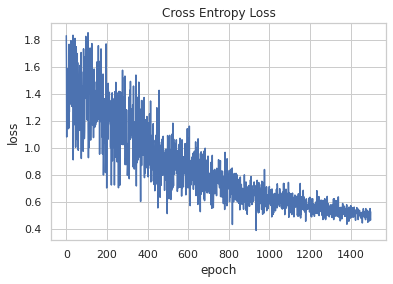

In [75]:
# Visualization of the results
# loss function
plt.plot(loss_trace)
plt.title('Cross Entropy Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

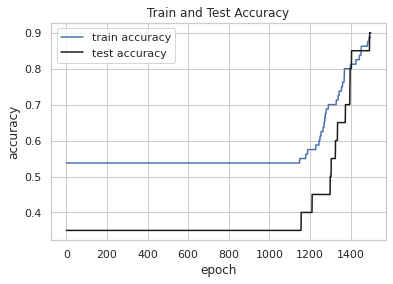

In [76]:
# accuracy
plt.plot(train_acc, 'b-', label='train accuracy')
plt.plot(test_acc, 'k-', label='test accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Train and Test Accuracy')
plt.legend(loc='best')
plt.show()